In [101]:
from torchvision import models, transforms
from torchsummary import summary
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt

import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

from lib.src import *
from lib.utils import *

from torchvision.models import resnet50

import random
import os
from tqdm import tqdm

In [102]:
DICT[0]

(0, 'n01440764', 'tench')

In [103]:
for key in DICT:
    if 'boa' in DICT[key][2].lower():
        print(key, DICT[key])

61 (61, 'n01742172', 'boa_constrictor')
n01742172 (61, 'n01742172', 'boa_constrictor')
342 (342, 'n02396427', 'wild_boar')
n02396427 (342, 'n02396427', 'wild_boar')
449 (449, 'n02859443', 'boathouse')
n02859443 (449, 'n02859443', 'boathouse')
508 (508, 'n03085013', 'computer_keyboard')
n03085013 (508, 'n03085013', 'computer_keyboard')
552 (552, 'n03325584', 'feather_boa')
n03325584 (552, 'n03325584', 'feather_boa')
554 (554, 'n03344393', 'fireboat')
n03344393 (554, 'n03344393', 'fireboat')
625 (625, 'n03662601', 'lifeboat')
n03662601 (625, 'n03662601', 'lifeboat')
667 (667, 'n03787032', 'mortarboard')
n03787032 (667, 'n03787032', 'mortarboard')
781 (781, 'n04149813', 'scoreboard')
n04149813 (781, 'n04149813', 'scoreboard')
814 (814, 'n04273569', 'speedboat')
n04273569 (814, 'n04273569', 'speedboat')
878 (878, 'n04505470', 'typewriter_keyboard')
n04505470 (878, 'n04505470', 'typewriter_keyboard')


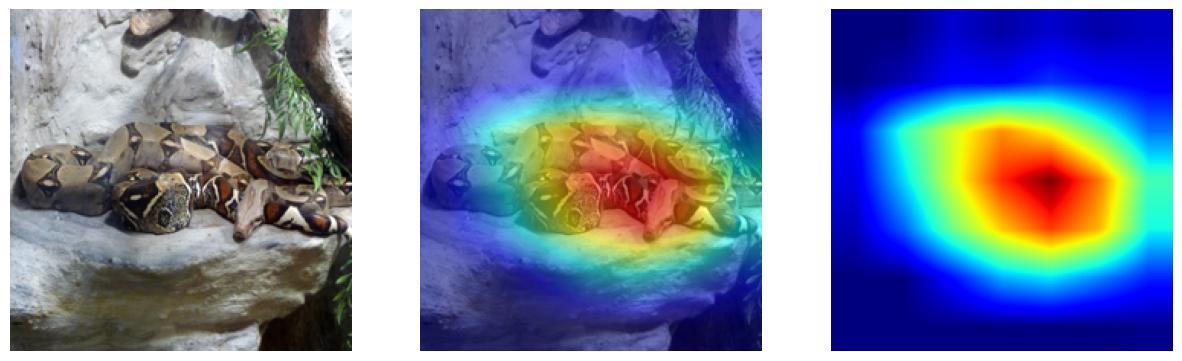

In [104]:
MODEL = resnet50(pretrained=True)
TARGET = MODEL.layer4[-1].conv3
IN_IMG = 224

FUNCTION = get_gradcam
HEATMAP = 0.5

CLASS_ID = 61
img = get_image_torch('images/boa.jpg', IN_IMG, IN_IMG)

cam = FUNCTION(img, MODEL, TARGET, CLASS_ID)
overlay_plot_torch(img, cam, HEATMAP)

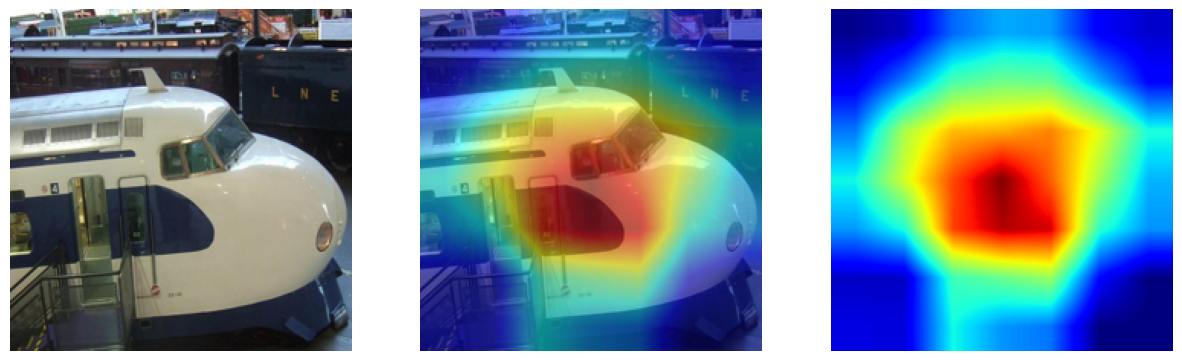

Real Class: bullet_train, ID: 466
895, warplane, 0.22
466, bullet_train, 0.16
408, amphibian, 0.12
908, wing, 0.05
404, airliner, 0.03


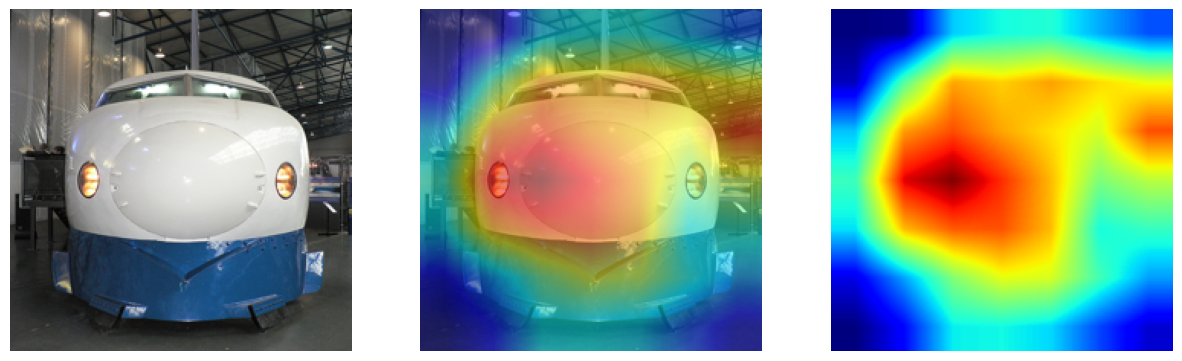

Real Class: bullet_train, ID: 466
895, warplane, 0.38
466, bullet_train, 0.28
861, toilet_seat, 0.07
908, wing, 0.04
847, tank, 0.03


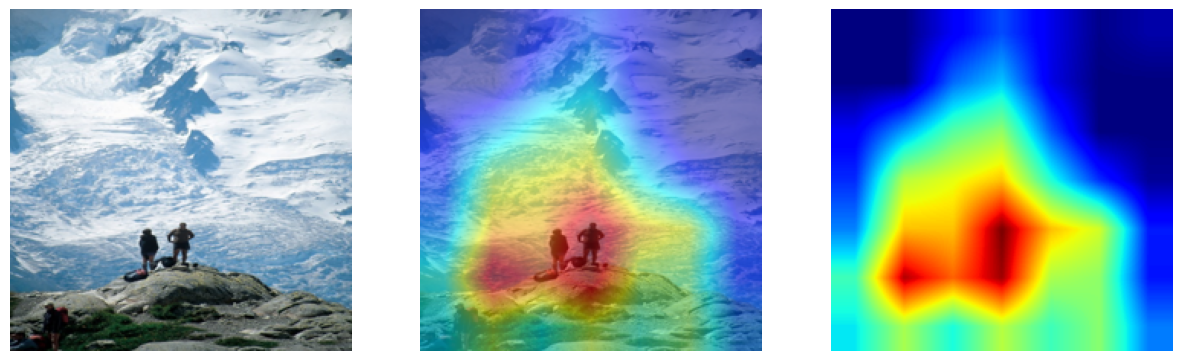

Real Class: alp, ID: 970
349, bighorn, 0.44
350, ibex, 0.34
172, whippet, 0.04
286, cougar, 0.02
299, meerkat, 0.02


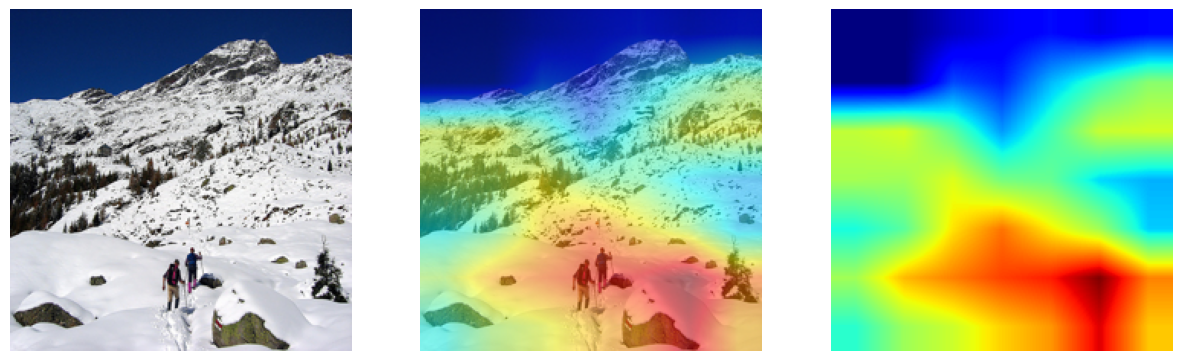

Real Class: alp, ID: 970
970, alp, 0.96
672, mountain_tent, 0.03
980, volcano, 0.00
979, valley, 0.00
795, ski, 0.00


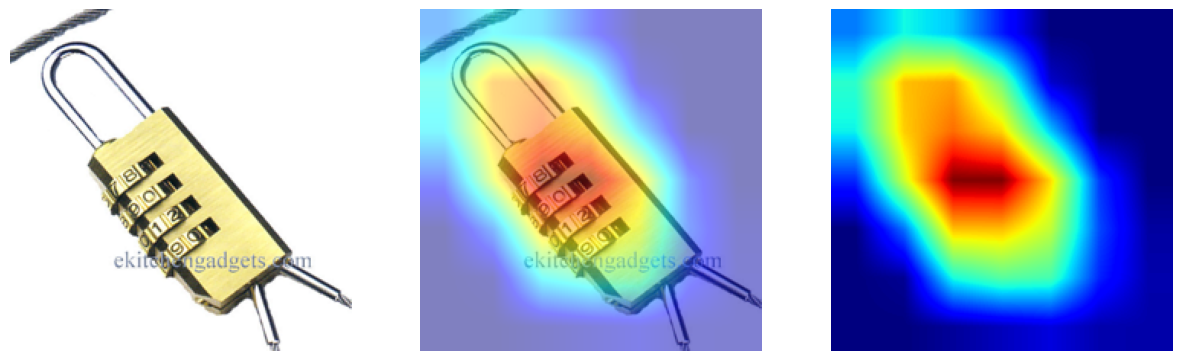

Real Class: combination_lock, ID: 507
507, combination_lock, 1.00
695, padlock, 0.00
513, cornet, 0.00
844, switch, 0.00
662, modem, 0.00


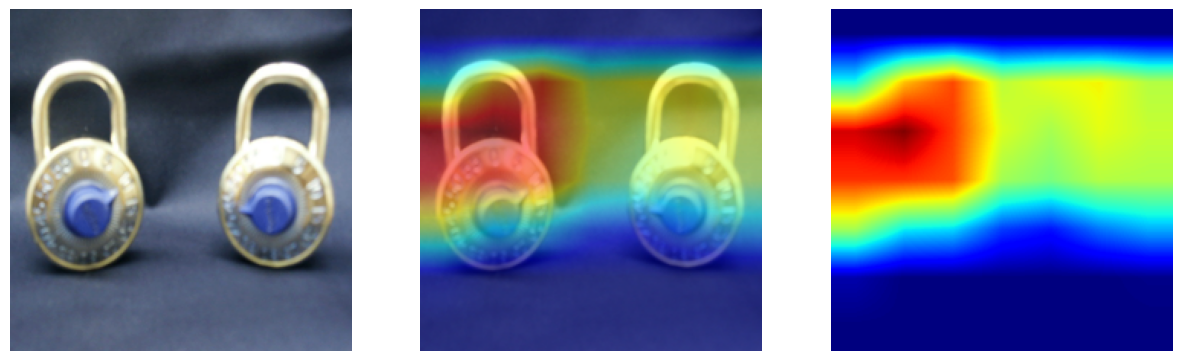

Real Class: combination_lock, ID: 507
680, nipple, 0.92
507, combination_lock, 0.04
901, whiskey_jug, 0.01
899, water_jug, 0.01
790, shopping_basket, 0.00


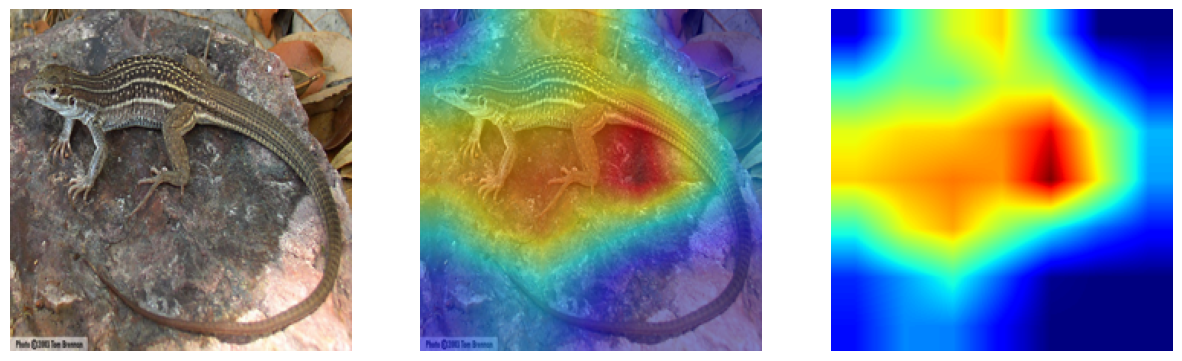

Real Class: whiptail, ID: 41
41, whiptail, 0.66
38, banded_gecko, 0.09
71, scorpion, 0.07
44, alligator_lizard, 0.04
42, agama, 0.02


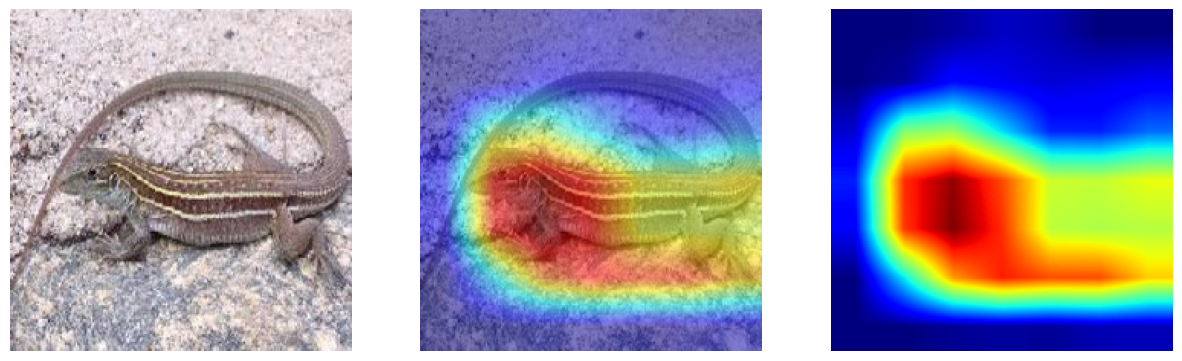

Real Class: whiptail, ID: 41
41, whiptail, 0.85
38, banded_gecko, 0.03
44, alligator_lizard, 0.02
26, common_newt, 0.01
390, eel, 0.01


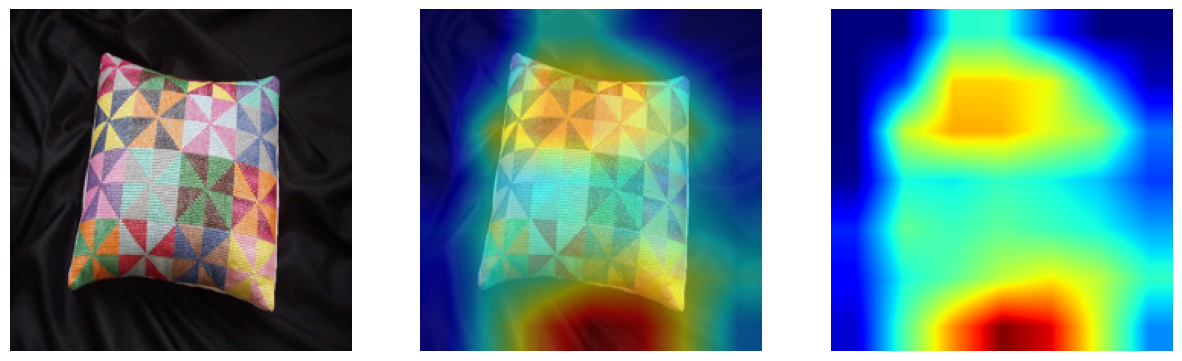

Real Class: pillow, ID: 721
721, pillow, 0.64
750, quilt, 0.26
549, envelope, 0.02
591, handkerchief, 0.01
692, packet, 0.01


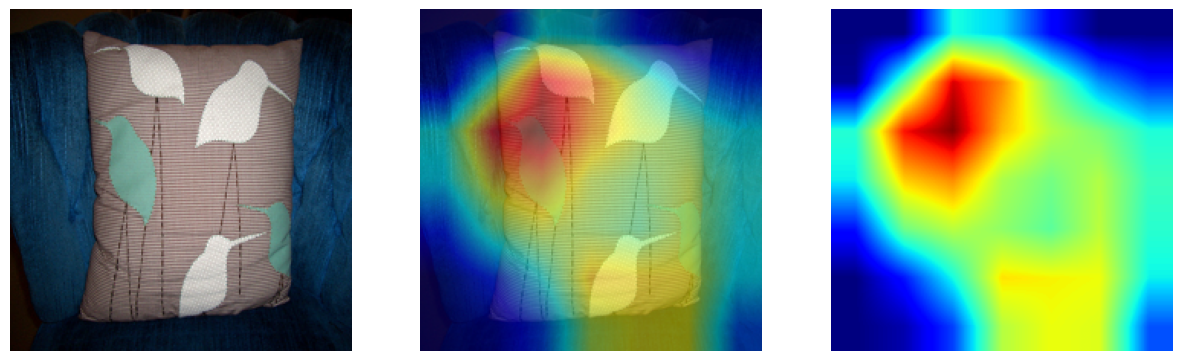

Real Class: pillow, ID: 721
721, pillow, 0.63
794, shower_curtain, 0.15
700, paper_towel, 0.02
999, toilet_tissue, 0.01
434, bath_towel, 0.01


In [106]:
from pathlib import Path
import random

ROOT = Path('imagenet-mini/train')

MODEL = resnet50(pretrained=True)
TARGET = MODEL.layer4[-1].conv3
IN_IMG = 224

FUNCTION = get_gradcam
HEATMAP = 0.5

for class_dir in random.sample(list(ROOT.iterdir()), 5):
    if class_dir.is_dir():
        for file_name in random.sample(list(class_dir.iterdir()), 2):
            MODEL = resnet50(pretrained=True)
            TARGET = MODEL.layer4[-1].conv3
            MODEL.eval()

            CLASS_ID, HASH, NAME = DICT[str(class_dir).split('/')[-1]]
            img = get_image_torch(file_name, IN_IMG, IN_IMG)
            cam = FUNCTION(img, MODEL, TARGET, CLASS_ID)
            overlay_plot_torch(img, cam, HEATMAP)

            print(f'Real Class: {NAME}, ID: {CLASS_ID}')


            MODEL = resnet50(pretrained=True)
            TARGET = MODEL.layer4[-1].conv3
            MODEL.eval()
            img = get_image_torch(file_name, IN_IMG, IN_IMG)
            pred1 = MODEL(img.unsqueeze(0))
            pred2 = torch.nn.functional.softmax(pred1, dim=1)
            _, indices = torch.sort(pred2, descending=True)
            indices = indices[0][:5]
            for ind in indices:
                print(f'{ind}, {DICT[ind.item()][2]}, {pred2[0][ind].item():.2f}')
